<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Visualización y limpieza con Pandas

Visualización de los datos del dataset iris\
v1.1

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/iris_dataset.png" width="1000" align="center"></a>

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from  sklearn import  datasets

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
iris=datasets.load_iris()
df_data = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df_target = pd.DataFrame(data= iris.target, columns= ['species'])
print(df_data.head())
print(df_target.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   species
0        0
1        0
2        0
3        0
4        0


In [3]:
# Generar una copia de df_target llamada "df_target_categorical" en el cual se almacenará los tipos de iris como variables categóricas (texto)
df_target_categorical = df_target.copy()

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [4]:
# Alumno: Utilizar apply y lambda expresion sobre df_target para modificar la columna "species" de df_target_categorical
# la lambda debe devolver:
# setosa --> si species = 0
# versicolor --> si species = 1
# virginica --> si species = 2

mapear_especies = lambda x: 'setosa' if x == 0 else ('versicolor' if x == 1 else 'virginica')


df_target_categorical['species'] = df_target['species'].apply(mapear_especies)

# Tip:
# df_target_categorical['species'] = df_target.apply(lambda......

In [5]:
# Alumno: Observar las primeras filas del nuevo df_target_categorical para corroborar que haya sido correcto el cambio
df_target_categorical.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [6]:
# Alumno: Contar cuantas especies de iris hay de cada una en el dataset df_target_categorical
conteo_especies = df_target_categorical['species'].value_counts()


print(conteo_especies)


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


In [7]:
# Concatenar ambos dataset
df = pd.concat([df_data, df_target_categorical], axis= 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Alumno: Analice si hay elementos incompletos en el dataset "df_data"

elementos_incompletos = df_data.isna().sum()


print(elementos_incompletos)


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [10]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
num_filas = df_data.shape[0]


print("Número de filas/datos para analizar:", num_filas)

Número de filas/datos para analizar: 150


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

In [13]:
# Alumno, separe el dataset "df" en un dataset por tipo de iris

df_setosa = df[df['species'] == 'setosa']
df_versicolor = df[df['species'] == 'versicolor']
df_virginica = df[df['species'] == 'virginica']


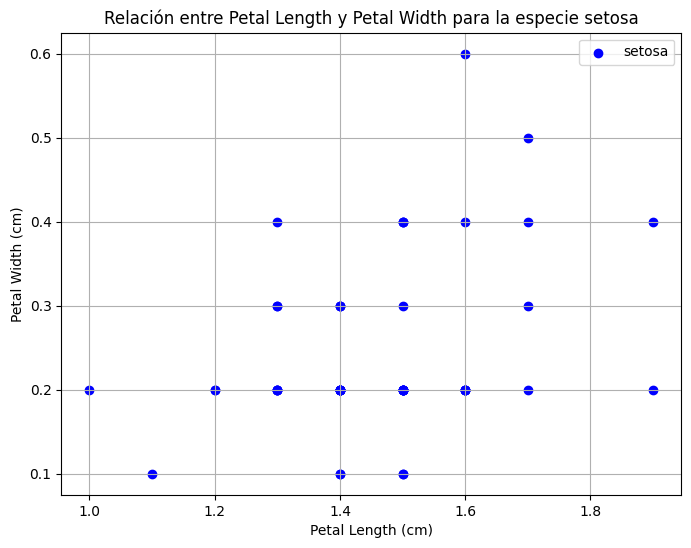

In [14]:
# Almuno: Realizar una función que reciba un dataframe como parámetro y grafique
# la relación (scatter plot) entre "petal length (cm)" (x) y "petal width (cm)" (y) de la especie setosa
import matplotlib.pyplot as plt

def graficar_relacion_setosa(df):

    df_setosa = df[df['species'] == 'setosa']


    petal_length_setosa = df_setosa['petal length (cm)']
    petal_width_setosa = df_setosa['petal width (cm)']


    plt.figure(figsize=(8, 6))
    plt.scatter(petal_length_setosa, petal_width_setosa, color='blue', label='setosa')


    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Relación entre Petal Length y Petal Width para la especie setosa')


    plt.legend()


    plt.grid(True)
    plt.show()


graficar_relacion_setosa(df)


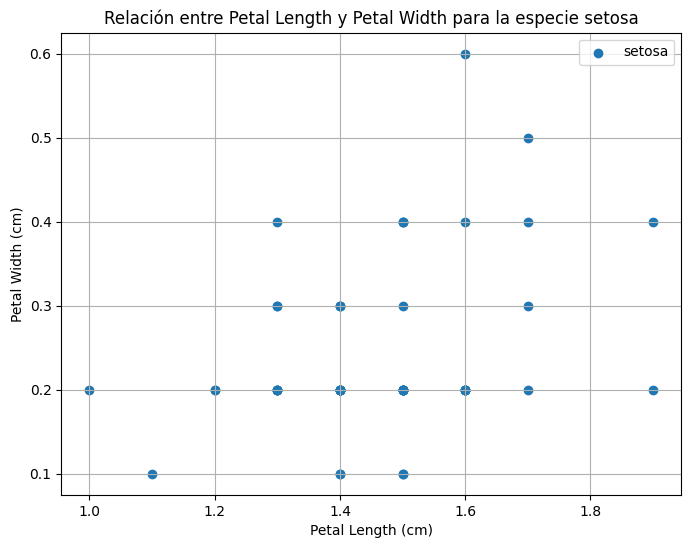

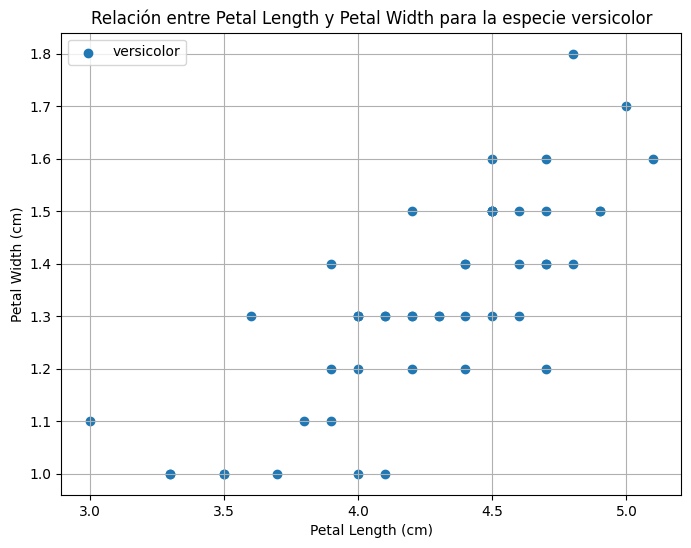

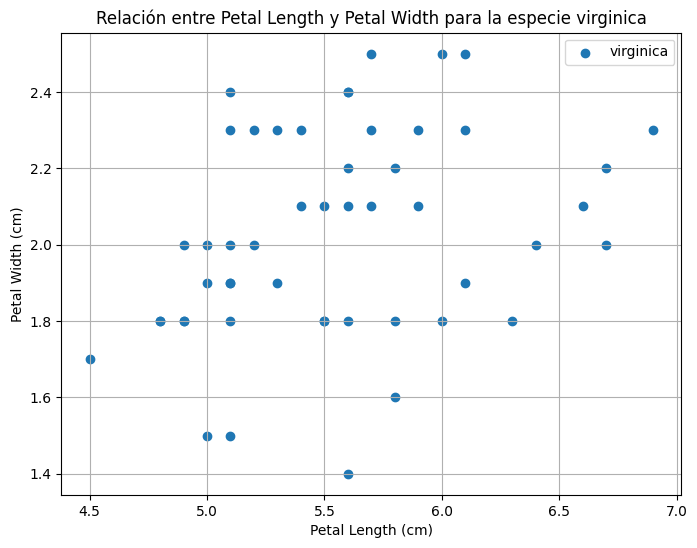

In [16]:
# Almuno: Utilizar la función generada para graficar la relación con dada dataframe de cada especie
def graficar_relacion_por_especie(df):
    # Obtener las especies únicas presentes en el DataFrame
    especies = df['species'].unique()

    # Iterar sobre cada especie y graficar la relación
    for especie in especies:
        # Filtrar el DataFrame por especie
        df_especie = df[df['species'] == especie]


        petal_length = df_especie['petal length (cm)']
        petal_width = df_especie['petal width (cm)']


        plt.figure(figsize=(8, 6))
        plt.scatter(petal_length, petal_width, label=especie)

        plt.xlabel('Petal Length (cm)')
        plt.ylabel('Petal Width (cm)')
        plt.title(f'Relación entre Petal Length y Petal Width para la especie {especie}')


        plt.legend()


        plt.grid(True)
        plt.show()

graficar_relacion_por_especie(df)
